### Problem statement
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase.

### Data Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model In this section You need to scrape the data of used cars from websites
(Olx, cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. 
The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns 
are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,Hatchback.
Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.

### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

# Importing required libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset

In [2]:
#Loading the data
df=pd.read_csv('usedcarprice.csv')  

In [3]:
df # checking the first 5 and last 5 rows

Unnamed: 0                                    Brand  Year Odometer  \
0              0                  Hyundai Grand i10 Magna  2014   46,983   
1              1             Hyundai Elite i20 Sportz 1.4  2015   59,731   
2              2                Maruti Suzuki Wagon R VXi  2017   28,316   
3              3                   Nissan Micra Active XV  2014   59,817   
4              4             Hyundai Elite i20 Sportz 1.2  2015   38,550   
...          ...                                      ...   ...      ...   
5445        5445  Hyundai Santro Xing (2008-2015) GL Plus  2011   18,151   
5446        5446                         Honda Brio VX MT  2015   37,369   
5447        5447                          Honda Brio S MT  2016    8,647   
5448        5448             Skoda Rapid 1.6 MPI Ambition  2015   22,376   
5449        5449        Hyundai i20 (2008-2010) 1.2 Magna  2010   67,363   

        Location    Fuel      Price  
0           Pune  Petrol  3.45 Lakh  
1      New Delhi  Diesel  5.32 Lakh  
2      Bangalore  Petrol  4.25 Lakh  
3      Bangalore  Petrol  3.53 Lakh  
4      Bangalore  Petrol  6.05 Lakh  
...          ...     ...        ...  
5445   New Delhi  Diesel  2.10 Lakh  
5446   New Delhi  Diesel  4.50 Lakh  
5447   New Delhi  Petrol  4.25 Lakh  
5448   New Delhi  Petrol  5.50 Lakh  
5449   Bangalore  Petrol  4.35 Lakh  

[5450 rows x 7 columns]

In [11]:
pd.read_csv("usedcarprice.csv").to_excel('usedcarprice.xlsx',index=False,sheet_name="usedcarprice.csv"[:-4],encoding='utf-8')

In [13]:
pd.read_excel("usedcarprice.xlsx") # I forgot to store the data into excel sheets instead store it in csv format .so here i again converted back to excel sheet.

Unnamed: 0                                    Brand  Year Odometer  \
0              0                  Hyundai Grand i10 Magna  2014   46,983   
1              1             Hyundai Elite i20 Sportz 1.4  2015   59,731   
2              2                Maruti Suzuki Wagon R VXi  2017   28,316   
3              3                   Nissan Micra Active XV  2014   59,817   
4              4             Hyundai Elite i20 Sportz 1.2  2015   38,550   
...          ...                                      ...   ...      ...   
5445        5445  Hyundai Santro Xing (2008-2015) GL Plus  2011   18,151   
5446        5446                         Honda Brio VX MT  2015   37,369   
5447        5447                          Honda Brio S MT  2016    8,647   
5448        5448             Skoda Rapid 1.6 MPI Ambition  2015   22,376   
5449        5449        Hyundai i20 (2008-2010) 1.2 Magna  2010   67,363   

        Location    Fuel      Price  
0           Pune  Petrol  3.45 Lakh  
1      New Delhi  Diesel  5.32 Lakh  
2      Bangalore  Petrol  4.25 Lakh  
3      Bangalore  Petrol  3.53 Lakh  
4      Bangalore  Petrol  6.05 Lakh  
...          ...     ...        ...  
5445   New Delhi  Diesel  2.10 Lakh  
5446   New Delhi  Diesel  4.50 Lakh  
5447   New Delhi  Petrol  4.25 Lakh  
5448   New Delhi  Petrol  5.50 Lakh  
5449   Bangalore  Petrol  4.35 Lakh  

[5450 rows x 7 columns]

Thus we see that dataset displays first 5 rows and last 5 rows.It shows 5450 rows and having 7 columns present in the dataframe.
Here the target label is "Price" which is continuous in nature hence this is considered as regression problem. The above features 
helps in predicting the price of the used car.

In [7]:
df.shape    #Checking the dimensions of the dataset

(5450, 7)

In [8]:
#Dropping Unnamed: 0 column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()  #Checking the dataset after dropping

Brand  Year Odometer    Location    Fuel      Price
0       Hyundai Grand i10 Magna  2014   46,983        Pune  Petrol  3.45 Lakh
1  Hyundai Elite i20 Sportz 1.4  2015   59,731   New Delhi  Diesel  5.32 Lakh
2     Maruti Suzuki Wagon R VXi  2017   28,316   Bangalore  Petrol  4.25 Lakh
3        Nissan Micra Active XV  2014   59,817   Bangalore  Petrol  3.53 Lakh
4  Hyundai Elite i20 Sportz 1.2  2015   38,550   Bangalore  Petrol  6.05 Lakh

In [9]:
df.dtypes #checking the datatypes

Brand       object
Year         int64
Odometer    object
Location    object
Fuel        object
Price       object
dtype: object

We need to convert the object datatype to numerical datatye before processing of model

### Dataset Description:
Brand - This shows the used car model names.

Year- Gives us the year in which the car was made.

Odometer- an instrument for measuring the distance i.e the number of kilometer driven by a wheeled vehicle.

Fuel Type - Shows the fuel type used by the vehicle.

Price - price of the used cars.

In [10]:
df.isna().sum() # checking for missing values

Brand       0
Year        0
Odometer    0
Location    0
Fuel        0
Price       0
dtype: int64

There is no missing value present in the dataframe

In [11]:
sns.heatmap(df.isnull()) #visual representation of missing value

<AxesSubplot:>

Thus visually no missing value is present inside the dataframe

### Data Cleaning

We can see that our datasets is having comma,words in the column values which we need to clear it before model building.so data
cleaning is required. 

In [12]:
df.duplicated().sum()

4

In [13]:
df = df.drop_duplicates()

In [14]:
#Copying the dataframe
df1=df.copy()

In [15]:
len(df1['Price'])

5446

In [16]:
#Removing Lakh word from price
df1['Price']=df1['Price'].apply(lambda x: x.strip(' Lakh'))

In [17]:
#replacing ',' with no space
df1['Price']=df1['Price'].apply(lambda x: x.replace(',',''))

In [18]:
#changing into float type
df1['Price']=df1['Price'].astype(float)

In [19]:
#converting the selected values into lakhs
df1['Price'] = df1['Price'].apply(lambda x: x/100000 if len(str(x)) > 6  else float(x)) 

In [20]:
df1['Price']=df1['Price'].apply(lambda x: int(round(x*pow(10,5))))

In [21]:
#replacing ',' with no space
df1['Odometer']=df1['Odometer'].apply(lambda x: x.replace(',',''))

In [22]:
#changing into int datatype
df1['Odometer']=df1['Odometer'].astype(int)

In [23]:
#keeping only three words of the brand
df1["Brand"]=df1["Brand"].str.split(' ').str.slice(0,3).str.join(' ')

In [24]:
df1.head(5) #validating the brand column 

Brand  Year  Odometer    Location    Fuel   Price
0    Hyundai Grand i10  2014     46983        Pune  Petrol  345000
1    Hyundai Elite i20  2015     59731   New Delhi  Diesel  532000
2  Maruti Suzuki Wagon  2017     28316   Bangalore  Petrol  425000
3  Nissan Micra Active  2014     59817   Bangalore  Petrol  353000
4    Hyundai Elite i20  2015     38550   Bangalore  Petrol  605000

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5446 entries, 0 to 5449
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     5446 non-null   object
 1   Year      5446 non-null   int64 
 2   Odometer  5446 non-null   int32 
 3   Location  5446 non-null   object
 4   Fuel      5446 non-null   object
 5   Price     5446 non-null   int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 276.6+ KB


In [26]:
df.nunique().sort_values().to_frame("Unique Values") #finding the unique values of each column

Unique Values
Fuel                  7
Year                 18
Location             38
Price               725
Brand              1205
Odometer           4990

Thus we can see the number of disntict values present in each column.

In [27]:
#checking the distinct value in fuel,location and year
value = ["Fuel", "Year","Location"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*100)

Fuel
Petrol       4082
Diesel       1244
LPG            63
•              27
CNG            24
CNGPetrol       5
Hybrid          1
Name: Fuel, dtype: int64
Year
2015    1047
2016     991
2014     783
2017     676
2013     582
2012     397
2011     327
2018     268
2010     202
2009      75
2008      36
2019      25
2007      20
2006       8
2005       4
2004       3
2003       1
2002       1
Name: Year, dtype: int64
Location
 New Delhi       1794
 Bangalore       1681
 Gurgaon          622
 Mumbai           370
 Navi Mumbai      285
 Noida            283
 Hyderabad        178
 Faridabad         55
 Ghaziabad         55
 Pune              42
 Thane             34
 Chennai           11
 Kolkata            5
 Ahmedabad          3
 Bhopal             2
 Lucknow            2
 Goalpara           2
 Indore             2
 Jhajjar            1
 Malappuram         1
 Mysore             1
 Rudrapur           1
 Vapi               1
 Secunderabad       1
 Bhandara           1
 Jamshedpur         1

Thus we can see in fuel type there is dot representing 27 values so we will convert it into others.

In [28]:
#replacing '.' with others in fuel column 
df1['Fuel']=df1['Fuel'].apply(lambda x: x if x!='•' else 'Others')


In [29]:
#Copying the dataframe
df=df1.copy()

In [30]:
df.head(5)

Brand  Year  Odometer    Location    Fuel   Price
0    Hyundai Grand i10  2014     46983        Pune  Petrol  345000
1    Hyundai Elite i20  2015     59731   New Delhi  Diesel  532000
2  Maruti Suzuki Wagon  2017     28316   Bangalore  Petrol  425000
3  Nissan Micra Active  2014     59817   Bangalore  Petrol  353000
4    Hyundai Elite i20  2015     38550   Bangalore  Petrol  605000

Thus we observe that dataset has been cleaned and handled for further analysis.

In [31]:
df.describe() #it provides statistical information about the numerical datatypes.

Year       Odometer         Price
count  5446.000000    5446.000000  5.446000e+03
mean   2014.404884   37098.972273  5.029536e+05
std       2.308297   21121.339701  3.715538e+05
min    2002.000000     250.000000  4.217900e+04
25%    2013.000000   21489.250000  3.200000e+05
50%    2015.000000   34870.000000  4.400000e+05
75%    2016.000000   50259.000000  5.850000e+05
max    2019.000000  498000.000000  8.500000e+06

Observation:
1.There is high variance in odometer.

2.The mean value is greater than median value that means data are positively skewed.

3.The high gap between the max and 75% lead to formation of outliers that can be seen in year,odometer(too much outlier are present) and price.

4.The minimum km driven by the used car is 250 km and the maximum km driven by the used car is 498000km.

5.The oldest vehicle is having the year of manufacture as 2002.

In [32]:
# description of the categorcal features
df.describe(include=np.object)

Brand    Location    Fuel
count                 5446        5446    5446
unique                 366          38       7
top     Maruti Suzuki Alto   New Delhi  Petrol
freq                   363        1794    4082

Thus For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. The unique represent the distinct values.

# Univariate Analysis

### univariate analysis using distplot to see whether they are normally distributed or skewness present

In [33]:
sns.distplot(df['Odometer']) 

<AxesSubplot:xlabel='Odometer', ylabel='Density'>

We observe high peak is formed in odometer and it lies far beywond the central positions.Its not normally distibuted.

In [34]:
sns.distplot(df['Price']) 

<AxesSubplot:xlabel='Price', ylabel='Density'>

We observe high peak is formed in Price and it lies far beywond the central positions.Its not normally distibuted.

<AxesSubplot:xlabel='Year', ylabel='Density'>

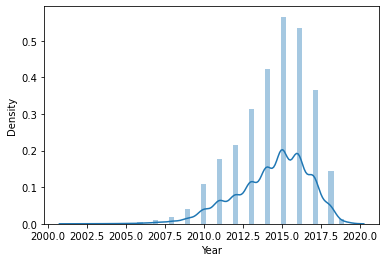

In [35]:
sns.distplot(df['Year']) 

The distribution of the data is not normally distributed and skewness present

In [36]:
print(df['Fuel'].value_counts())
sns.countplot(df['Fuel'])
plt.figure(figsize=[7,7])

Petrol       4082
Diesel       1244
LPG            63
Others         27
CNG            24
CNGPetrol       5
Hybrid          1
Name: Fuel, dtype: int64


<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

Thus we observe that people are preferring more in purchasing "petrol" as fuel in used car followed by diesel and the least
is hybrid.

<AxesSubplot:xlabel='Odometer'>

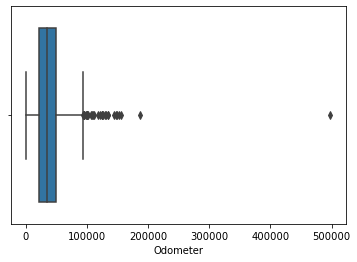

In [37]:
sns.boxplot(df['Odometer'])

We can see outlier is present in odometer.

<AxesSubplot:xlabel='Year'>

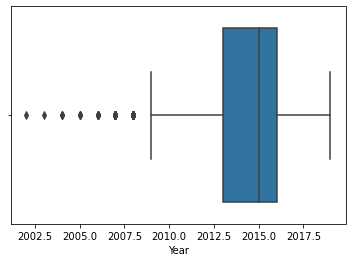

In [38]:
sns.boxplot(df['Year'])

Outlier is present in year column.

<AxesSubplot:xlabel='Price'>

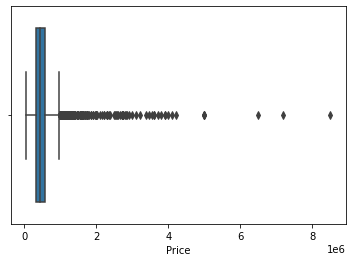

In [39]:
sns.boxplot(df['Price'])

We observe in the price column outlier is present,as this is the target column we will leave like this.

# Bivariate Analysis

<AxesSubplot:xlabel='Odometer', ylabel='Price'>

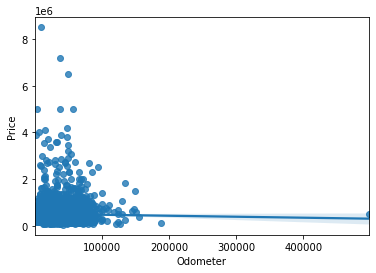

In [40]:
#Bivariate Analysis
sns.regplot(x="Odometer",y="Price",data=df) 

Thus we see less km_driven by the used car are priced higher.Thus most of the vehicles km_driven is concentrated
around 0-100k ,thus price is almost constant there.

<AxesSubplot:xlabel='Year', ylabel='Price'>

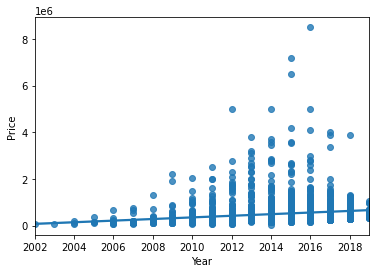

In [41]:
sns.regplot(x="Year",y="Price",data=df) 

Thus price is directly proportional to year of manufacture. Thus latest manufacturing dates are ususlly preferred by people.


<AxesSubplot:xlabel='Fuel', ylabel='Price'>

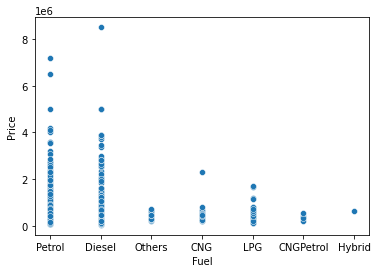

In [42]:
sns.scatterplot(x="Fuel",y="Price",data=df) 

Maximum Cars run on either Petrol or diesel. Only few goes for CNG and others fuels

<AxesSubplot:xlabel='Location', ylabel='Price'>

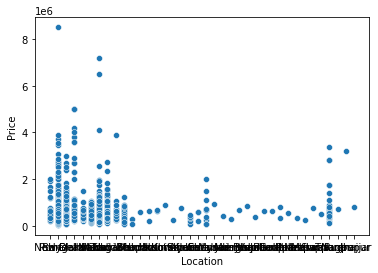

In [43]:
sns.scatterplot(x="Location",y="Price",data=df) 

In [44]:
df_obj=["Location","Fuel"]
df_obj

['Location', 'Fuel']

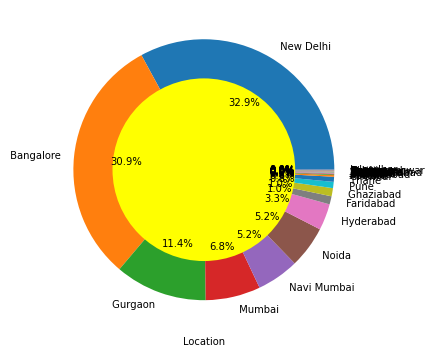

<Figure size 432x288 with 0 Axes>

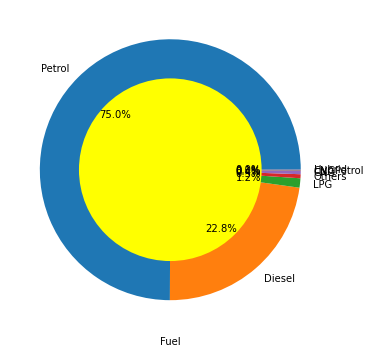

<Figure size 432x288 with 0 Axes>

In [45]:
for i in df_obj:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='yellow')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

Thus through pie plot,we see location wise,most of the used cars are selled in Delhi around 33.3% followed by bangalore at 30.8%.As per fuel type,Around 75% of the people prefer purchasing having petrol followed by diesl which accounts to 22.8%. 

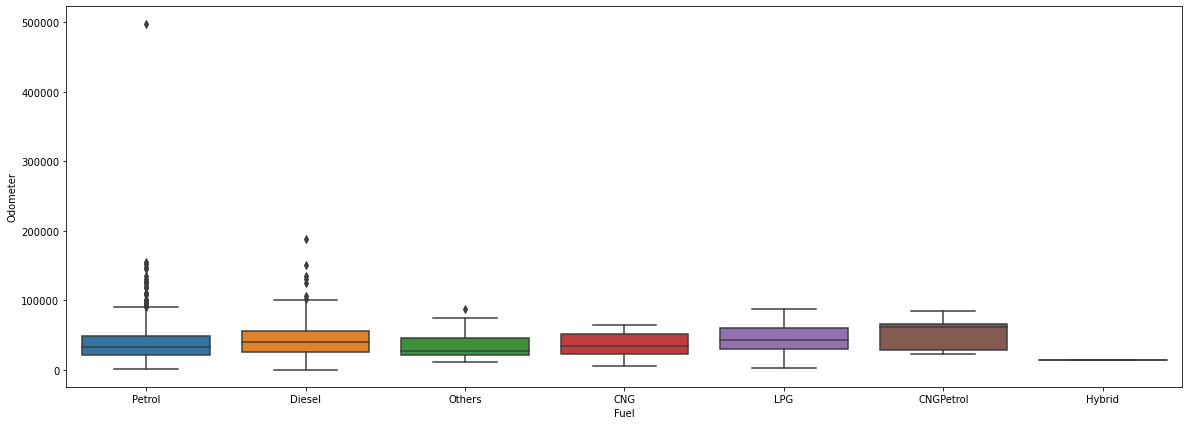

In [46]:
#BoxPlot #representation fuel and odometer
plt.figure(figsize=(20,7))
sns.boxplot(data = df, x='Fuel', y='Odometer')
plt.show()

Thus we see vehicle having CNGPterol have average km_driven highest among others followed by Diesel and LPG thereafter comes
petrol.

# Multivariate Analysis

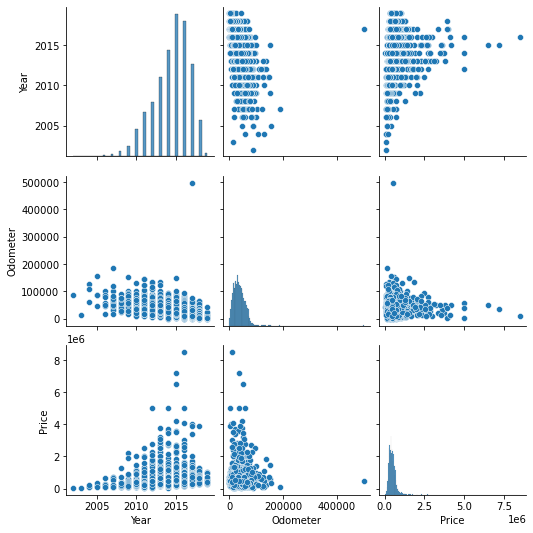

In [47]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
The pairs plot builds on two basic figures, the histogram and the scatter plot. Thus we see that year and price are positively correlated ,we can say that for the brands having manufacturing year from 2010-2015,the price seems to be on the higher side.
Thus we see from price and odometer relationship that higher the km_driven by the vehicles is less purchased by the people and price is less.Mostly km_driven is constant between 0-200k km as the price for these is also constant.

In [48]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

Year  Odometer     Price
Year      1.000000 -0.525766  0.215375
Odometer -0.525766  1.000000 -0.023863
Price     0.215375 -0.023863  1.000000

Thus we see that odometer is negatively correlative with Year. Price is positively correlated with Yearand negatively correlated with
Odometer.As price is priced higher if the km_driven is less and vice versa.

# Correlation using a Heatmap

<AxesSubplot:>

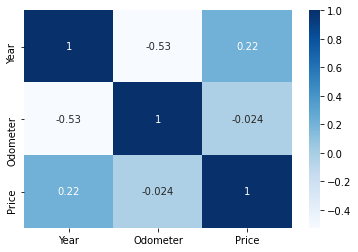

In [49]:
sns.heatmap(df.corr(),cmap="Blues",annot= True)

Thus we see that heatmap shows that price is positively correlated to year around 22% and negatively correlated to odometer .
Also odometer and year are negatively correlated at 53%

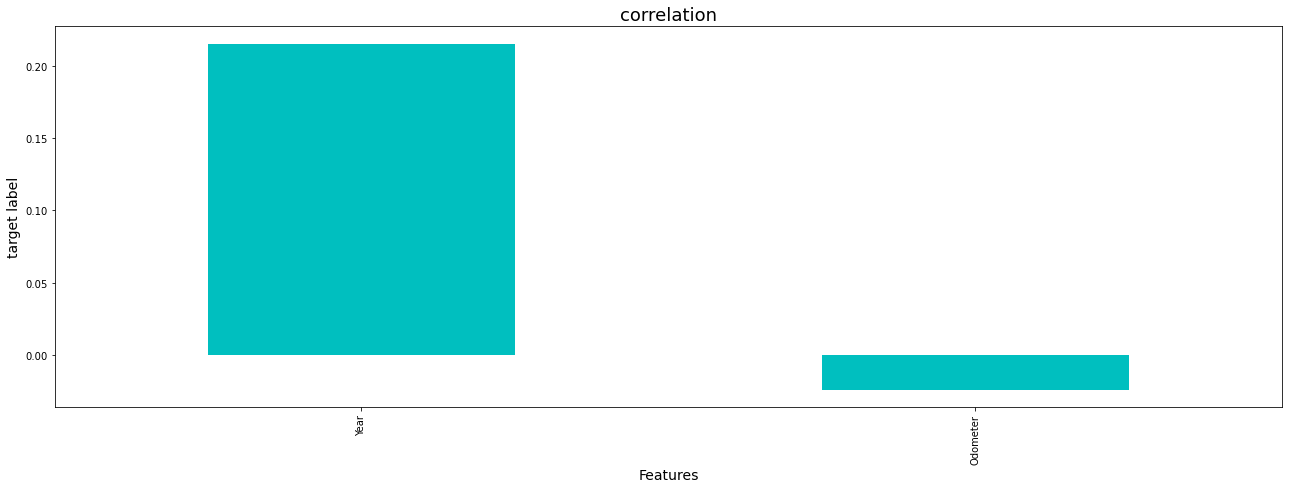

In [50]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Thus we can see price is positively corrrelated with year and negatively correlated with odometer

# Handling Outliers

Year           AxesSubplot(0.125,0.826831;0.0824468x0.053169)
Odometer    AxesSubplot(0.223936,0.826831;0.0824468x0.053169)
Price       AxesSubplot(0.322872,0.826831;0.0824468x0.053169)
dtype: object

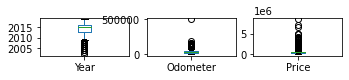

In [51]:
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

In [52]:
#removal of outliers
col= df[["Year","Odometer"]]
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(col))
# Creating new dataframe by setting z to 6
df_new = df[(z<6).all(axis=1)] 
df_new

Brand  Year  Odometer    Location    Fuel   Price
0           Hyundai Grand i10  2014     46983        Pune  Petrol  345000
1           Hyundai Elite i20  2015     59731   New Delhi  Diesel  532000
2         Maruti Suzuki Wagon  2017     28316   Bangalore  Petrol  425000
3         Nissan Micra Active  2014     59817   Bangalore  Petrol  353000
4           Hyundai Elite i20  2015     38550   Bangalore  Petrol  605000
...                       ...   ...       ...         ...     ...     ...
5445      Hyundai Santro Xing  2011     18151   New Delhi  Diesel  210000
5446            Honda Brio VX  2015     37369   New Delhi  Diesel  450000
5447             Honda Brio S  2016      8647   New Delhi  Petrol  425000
5448          Skoda Rapid 1.6  2015     22376   New Delhi  Petrol  550000
5449  Hyundai i20 (2008-2010)  2010     67363   Bangalore  Petrol  435000

[5444 rows x 6 columns]

In [53]:
print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe Shape before removing outliers:  (5446, 6)
Dataframe Shape after removing outliers:  (5444, 6)
Percentage of data loss after outlier removal:  0.03672420124862284


Observation:
We observe that when we are taking threshold as 3,around 97% of data loss can be seen ,thus we cant move forward with this.
Thus we are taking threshold as 6 and saw that data loss percentage is 3% which is acceptable.

In [54]:
#using Label encoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df_new.columns:
    if df_new[i].dtypes== "object":
        df_new[i]= enc.fit_transform(df_new[i].values.reshape(-1,1))

In [55]:
#checking the encoding
df_new

Brand  Year  Odometer  Location  Fuel   Price
0       150  2014     46983        31     6  345000
1       146  2015     59731        28     2  532000
2       222  2017     28316         1     6  425000
3       247  2014     59817         1     6  353000
4       146  2015     38550         1     6  605000
...     ...   ...       ...       ...   ...     ...
5445    151  2011     18151        28     2  210000
5446    105  2015     37369        28     2  450000
5447    103  2016      8647        28     6  425000
5448    283  2015     22376        28     6  550000
5449    166  2010     67363         1     6  435000

[5444 rows x 6 columns]

### Separating x and y as independent and dependent variable

In [56]:
df_new.shape

(5444, 6)

In [57]:
x=df_new.drop(columns=['Price'])
y=df_new['Price']

In [58]:
#Checking x data
x.head()

Brand  Year  Odometer  Location  Fuel
0    150  2014     46983        31     6
1    146  2015     59731        28     2
2    222  2017     28316         1     6
3    247  2014     59817         1     6
4    146  2015     38550         1     6

In [59]:
#Checking y data after splitting
y.head()

0    345000
1    532000
2    425000
3    353000
4    605000
Name: Price, dtype: int64

In [60]:
x.skew()

Brand       0.252707
Year       -0.754867
Odometer    0.674068
Location   -0.208088
Fuel       -1.244717
dtype: float64

# Treating skewness

In [61]:
#using power transform it can work uoon both negative and positive skewed value 
from sklearn.preprocessing import power_transform
x=pd.DataFrame(power_transform(x,method='yeo-johnson'))
x

0         1         2         3         4
0    -0.458750 -0.204726  0.587323  1.079621  0.575210
1    -0.512770  0.237636  1.108631  0.919898 -1.767739
2     0.468827  1.153200 -0.312198 -1.346266  0.575210
3     0.774885 -0.204726  1.111965 -1.346266  0.575210
4    -0.512770  0.237636  0.206109 -1.346266  0.575210
...        ...       ...       ...       ...       ...
5439 -0.445294 -1.472821 -0.921491  0.919898 -1.767739
5440 -1.086929  0.237636  0.149803  0.919898 -1.767739
5441 -1.116046  0.690202 -1.660191  0.919898  0.575210
5442  1.204270  0.237636 -0.653093  0.919898  0.575210
5443 -0.245643 -1.876574  1.396512 -1.346266  0.575210

[5444 rows x 5 columns]

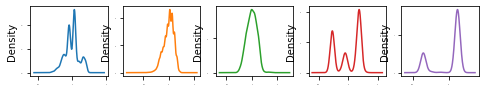

In [62]:
x.plot(kind="density",subplots=True,layout=(8,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we see that it has almost treated the skewwness but some columns do have ,we will work with the same.

# Feature Scaling

In [63]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x= pd.DataFrame(ss.fit_transform(x))

# Building the model

In [64]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [65]:
#Finding the best random state
max_ran_score=0
for ran_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=ran_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_ran_score:
        max_ran_score=r2_scr
        final_ran_state=ran_state
print("max r2 score corresponding to",final_ran_state,"is",max_ran_score)

max r2 score corresponding to 70 is 0.12104787491998081


Thus we see that max r2 score corresponding to 70 is 12.01% 

In [66]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=.33)

# Modeling without tuning

In [67]:
#Importing the algorithms and other parameters
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
#importing required metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [68]:
lr = LinearRegression()
lsr = linear_model.Lasso(random_state = 70)
rr = linear_model.Ridge(random_state=70)
rfr = RandomForestRegressor(random_state=70)
svr=SVR()
ada= AdaBoostRegressor()
gdb=GradientBoostingRegressor()
dtr = tree.DecisionTreeRegressor(random_state=70)
knnr = KNeighborsRegressor()
xg = XGBRegressor(random_state=70)


models=[lr,lsr,rr,svr,rfr,ada,gdb,dtr,knnr,xg]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape=[]
cvs=[]


for i in models:  
    i.fit(x_train,y_train)
    r2_train = round(i.score(x_train, y_train),3)
    r2_test = round(i.score(x_test, y_test),3)
    scores_train.append(round(r2_train,3))
    scores_test.append(round(r2_test,3))
    y_pred = i.predict(x_test)
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100,3))
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train,i.predict(x_train))),3))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test,i.predict(x_test))),3))
       

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': scores_train,'Test R2': scores_test, 'MAPE':mape},
            index=['Linear Regression','Lasso Regression','SVR Regression','AdaBoost Regression','GradientBoosting Regression','Ridge Regression','Random Forest Regression','Decision Tree Regression', 'KNN Regression','XGB Regression']))

                             Train RMSE   Test RMSE  Train R2  Test R2  \
Linear Regression            390116.349  280052.835     0.061    0.121   
Lasso Regression             390116.349  280052.952     0.061    0.121   
SVR Regression               390116.352  280055.126     0.061    0.121   
AdaBoost Regression          408113.910  303553.067    -0.028   -0.033   
GradientBoosting Regression  106886.473  207805.159     0.929    0.516   
Ridge Regression             434293.300  458833.821    -0.164   -1.359   
Random Forest Regression     166643.309  190212.850     0.829    0.595   
Decision Tree Regression          0.000  336951.039     1.000   -0.272   
KNN Regression               321645.780  298659.247     0.362    0.000   
XGB Regression                36306.807  160157.736     0.992    0.713   

                                MAPE  
Linear Regression             38.084  
Lasso Regression              38.084  
SVR Regression                38.086  
AdaBoost Regression          

Observation: For Linear Models, the MAPE(Mean absolute percentage error) states that the predicted values are ~38-98% away from actuals where ridge is performing very badly.

For Non-Linear Models / ensemble models, Decision Tree models overfits. AdaBoost model and KNN rgression performs poor whereas XGB regression is performing the best followed by gradient boosting regression model followed by random forest among non-linear models/ensemble models, with MAPE as 12.79% ,16.44% and 20.73 % respectively .Comparing all the models, choosing XGB Regressor, Gradient Boosting Regressio model and Random Forest Regressor model for hyperparameter tunning to get more accuracy and score.

RMSE indicates the absolute fit of the model or spread out of residual. R2 indicates proportion of variance for a dependent variable that is explained by independent variables. Both RMSE and R2 are relative measure of fit. MAPE indicates to what extent predicated values are away from actual.

### cross validation score for all the models

In [69]:
#Random Forest Regressor  Model
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 45.519291266307874


In [73]:
#Decission Tree Regressor Model
dtscore=cross_val_score(dtr,x,y,cv=5,scoring='accuracy')
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

Cross Val Score: 2.7003321989953006


In [77]:
#AdaBoost Regressor Model
adscore=cross_val_score(ada,x,y,cv=5)
adc=adscore.mean()
print('Cross Val Score:',adc*100)

Cross Val Score: -204.77530900259282


In [76]:
#Gradient Boosting Regressor Model
gbscore=cross_val_score(gdb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

Cross Val Score: 41.93240313984414


In [80]:
#Support Vector Regressor Model
svscore=cross_val_score(svr,x,y,cv=5)
svc=svscore.mean()
print('Cross Val Score:',svc*100)

Cross Val Score: -7.99489393583674


In [81]:
lassoscore=cross_val_score(lsr,x,y,cv=5)
lsc=lassoscore.mean()
print('Cross Val Score:',lsc*100)

Cross Val Score: 7.794446377264109


In [82]:
#Ridge Model
ridgescore=cross_val_score(rr,x,y,cv=5)
rdc=ridgescore.mean()
print('Cross Val Score:',rdc*100)

Cross Val Score: 7.796088196075631


In [83]:
#Knn Regressor Model
knnscore=cross_val_score(knnr,x,y,cv=5)
knnc=knnscore.mean()
print('Cross Val Score:',knnc*100)

Cross Val Score: -11.198749006403375


In [84]:
#XGBoost Model
xgbscore=cross_val_score(xg,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

Cross Val Score: 51.175351568377394


Thus comparing cross validation of all ,we find XGB regressor ,gradient boosting and random forest are performing well .

Thus on the basis evaluation metrics like rmse,r2 score,MAPE and cross validation score,we will take XGB Regressor,Random Forest Regressor and Gradient Boosting for hyperparamter tunning

### HYPERPARAMETER TUNING THROUGH GRIDSEARCHCV

So now we are going to fine-tune the hyperparameters using GridSearchCV on Gradient BoostingForest,XGB Regressor and Random Forest Regressor. GridSearchCV automatically tunes the hyperparameters with the parameters specified to find the best parameters and the best estimator,this helps us from manually having to tune, which would take a lot of time.

### Hyperparameter tuning for Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= { 'loss':['squared_error','absolute_error'],
              'learning_rate':[0.1,0.01], 
              'n_estimators':[2,5,10,20],
              'criterion':['mae','mse'],      
            }

gdb=GradientBoostingRegressor()
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [87]:
gdb=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gdb.fit(x_train,y_train)
gdb.score(x_train,y_train)
pred_decision=gdb.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gdb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 19.681586001085847
Cross Val Score: 15.751557840771891


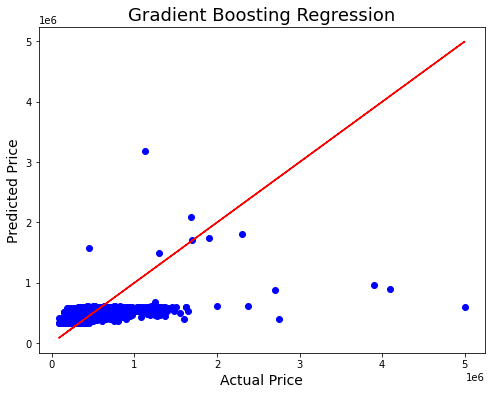

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("Gradient Boosting Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is unable to cover most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score.

### Hyperparameter tuning for XGB Regressor

In [88]:
from xgboost import XGBRegressor
parameters= { 'n_estimators': [100, 400, 800],
               'max_depth': [3, 6, 9],
              'learning_rate': [0.05, 0.1, 0.20],
             'min_child_weight': [1, 10, 100]      
            }

xg=XGBRegressor()
clf=GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 800}


In [89]:
xg=XGBRegressor(learning_rate= 0.05,max_depth=6,min_child_weight=1,n_estimators=800 )
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
pred_decision=xg.predict(x_test)

xgs=r2_score(y_test,pred_decision)
print('R2 Score',xgs*100)

xgscore=cross_val_score(xg,x,y,cv=5)
xgc=xgscore.mean()
print('Cross Val Score:',xgc *100)

R2 Score 65.3630492444031
Cross Val Score: 49.86281938326243


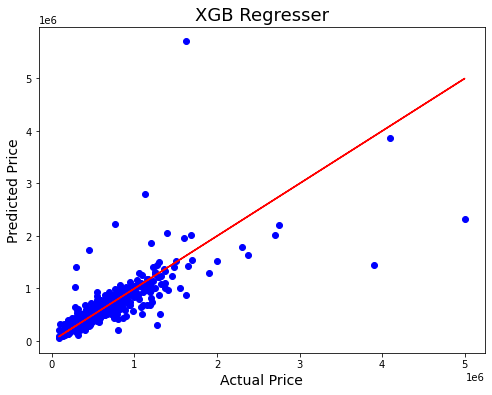

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("XGB Regresser",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is covering most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score.

### Hyperparameter tuning for Random Forest Regressor

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
parameters = {
    'max_depth':[2,5,10,20,30],
    'min_samples_leaf':[1,2,4],
    'n_estimators':[100,150,200],
    'min_samples_split':[2,5,10,15],
        }
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [92]:
rfr=RandomForestRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=5,n_estimators=200)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 55.154834343310654
Cross Val Score: 48.09176151562298


In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("Random Forest Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is covering most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score.

#### Model Analysis using Hyperparameter:
Thus After applying hyperparameter search through GridSearchcv we find that :

 Model                   :  r2_score accuracy //cross validation score (in %)
 
 Random Forest Regressor :  55.15             //  48.09
 
 XGB Regressor           :  65.36             //  49.86
 
 Gradient Boosting Regressor:19.68            //15.75
 
Thus we see that XGB Regressor is performing better as the r2 score is 65.36 and cross val score is 49.86.Thus we will choose XGB Regressor Model for further deployement process. 

# Saving the model :XGB Regressor :Best Model

In [94]:
import pickle
filename='usedcarprice_prediction.pkl'
pickle.dump(xg,open(filename,'wb'))

### Loading the saved model

In [95]:
loaded_model=pickle.load(open('usedcarprice_prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) 

65.3630492444031


In [96]:
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

We can see that xgb Regressor algorithm, which was finalized as best model and saved after we found that it was the best model performing, is loaded and also showing the best parameters we obtained after doing Hyperparameter Tuning.

# Predictions over test data

In [97]:
#Making a dataframe for the SalePrice predictions
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0          1             2          3            4     \
Predicted  301360.59375  298823.25  392372.03125  438022.25  314473.0625   
Original   180000.00000  385000.00  375000.00000  405000.00  295000.0000   

                   5           6             7             8            9     \
Predicted  284074.84375  500493.125  410783.28125  478622.09375  522724.5625   
Original   290000.00000  550000.000  335000.00000  475000.00000  500000.0000   

           ...          1787          1788         1789         1790  \
Predicted  ...  467946.78125  511451.03125  662242.6875  303866.6875   
Original   ...  505000.00000  421000.00000  537000.0000  275000.0000   

                   1791           1792         1793          1794  \
Predicted  277280.96875  232671.578125  322640.0625  420079.21875   
Original   265000.00000  225000.000000  310000.0000  385000.00000   

                  1795        1796  
Predicted  339736.6875  484780.625  
Original   315000.0000  315000.000  

[2 rows x 1797 columns]

# Conclusion

CONCLUDING REMARKS:
The objective of the case was to create a predictive machine learning model that predicts price of used car with the available independent variables in order to make informed purchases. So first I started with loading the dataset and carry out data analysis and then did the EDA process with visualization patterns using pie-plot, box plot, distribution plot ,boxplot and learnt about different relationship between the features and target variable.

After that I did pre-processing techniques like checking outliers, removal of skewness, encoding of categorical column, scaling. 

Then I did the model training, building the model and finding out the best model out of several models on the basis of different evaluation metrices scores like Mean Absolute Error, Mean squared Error, Root Mean Squared Error,MAPE etc.

We find that XGB Regressor was the best fitted model as it was having less MAPE(which means how much predicted results and actual results are away,Less Mape means good fit model) ,more R2 score ,more cross val score among other models.Then I did cross validation to reduce overfitting problem and I found random forest regressor,xgb regressor, gradient boosting are performing well. So I did hypertunning through GridsearchCv on these three models taking the parameters to improve the model. Thus we observe that after hypertuning ,the score has not improved but it the best approximation after reducing overfitting and variance.Thus concluded that XGB Regressor Model was performing well and save it as best model.

Thus finally concluding saying that XGB Regressor model was having the highest precision accuracy for prediction the  price of the used car with machine learning data. Hence by implementation of this model one can make predeiction of the price of the used car based on the features given.

I saved the best model using pickle method and loaded the model for prediction test and find 65.36% accuracy which is quite good. Thus this model can be used in further deployment process.

Overall, this dataset is good for predicting the Housing prices based on regression analysis using XGB Regressor as the best suited model.